In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 

plt.style.use('seaborn-darkgrid')

## Элементарная нейронная сеть

    Поэксперементирую с первыми нейронными сетями. 
    Потом это будет для меня конспектом. 
    Создаю простейшую полносвязную нейронную сеть с 2умя слоями
    На первом слоё будет 2 нейрона, на втором 1 нейрон
    На вход подается 4 сигнала. 
    Функция активации пороговая 

In [2]:
def act(x):
    return 0 if x< 0.5 else 1

In [3]:
def perceptron(x1, x2, x3, x4):
    x = np.array([x1, x2, x3, x4])  #входные сигналы
    w11 = [0.9, 0.2, 0.8, 0.2]   # веса первого нейрона
    w12 = [0.1, 0.6, 0.1, 0.9]  # веса второго нейрона
    weight1 = np.array([w11, w12])  #первый слой НС
    weight2 = np.array([-0.1, 0.8])  #веса второго слоя НС
    
    sum_hidden = weight1 @ x    # получаю значение сумм на входах нейронов
    print('Значение сумм на входах нейронов скрытого слоя: ' + str(sum_hidden))
    
    out_hidden = np.array([act(x) for x in sum_hidden])  # применяю функцию активации 
    print('Значение на выходах нейронов скрытого слоя: ' + str(out_hidden))
    
    sum_end = weight2 @ out_hidden  # получаю значение сумм на входе второго слоя
    y = act(sum_end)  #применяю функцию активации 
    print('Выходное значение НС: ' + str(y))
    return y

In [4]:
res = perceptron(1, 1, 0, 1)

if res == 1:
    print('Нейронная сеть активировалась')
else:
    print('Нейронная сеть выдала 0')

Значение сумм на входах нейронов скрытого слоя: [1.3 1.6]
Значение на выходах нейронов скрытого слоя: [1 1]
Выходное значение НС: 1
Нейронная сеть активировалась


## Возможности персептрона

Нейронные сети возможно использовать для классификации 

In [5]:
N = 30
x1 = np.random.random(N)
x2 = x1 + [np.random.randint(10)/10 for i in range(N)]
C1 = [x1, x2]

x1 = np.random.random(N)
x2 = x1 - [np.random.randint(10)/10 for i in range(N)] - 0.1
C2 = [x1, x2]

Создаю 2 класса точек

Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1


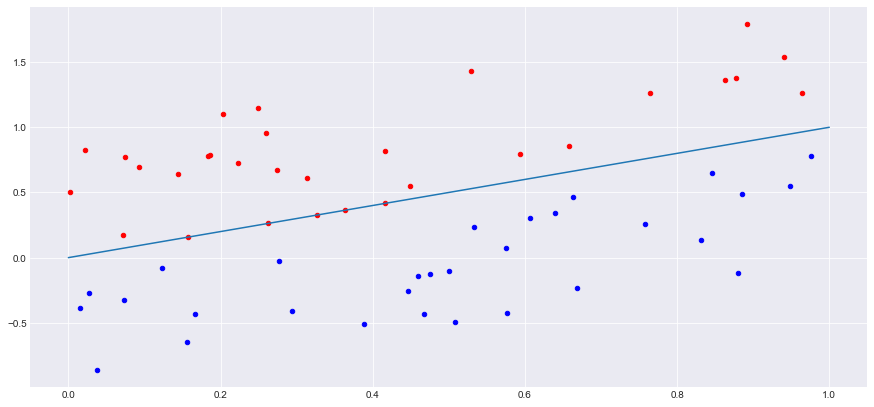

In [6]:
w = np.array([-0.5, 0.5])  #веса нейрона  
for i in range(N):
    x = np.array([C1[0][i], C1[1][i]])  #прохожусь по классу точек С1
    y = w @ x   #получаю значение суммы на входе нейрона   
    if y >= 0:  #далее идёт простейшая функция активации нейрона
        print('Класс С1')
    else:
        print('Класс С2')
        
        
        
plt.figure(figsize= (15,7))        
plt.scatter(C1[0][:], C1[1][:], s = 20, c = 'red')
plt.scatter(C2[0][:], C2[1][:], s = 20, c = 'blue')
plt.plot([0, 1])
plt.grid(True)
plt.show()

## Смещение 

На практике присутствует смещенние вдоль оси. Для этого добавляется bias к нейрону, что бы учитывать смещение

In [7]:
N = 30 # количество точек
b = 4 # смещение 
x1 = np.random.random(N) 
x2 = x1 + [np.random.randint(10)/10 for i in range(N)] + b
C1 = [x1, x2]  # точки первого класса 

x1 = np.random.random(N)
x2 = x1 - [np.random.randint(10)/10 for i in range(N)] - 0.1 + b
C2 = [x1, x2]  #точки второго класса 

Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1
Класс С1


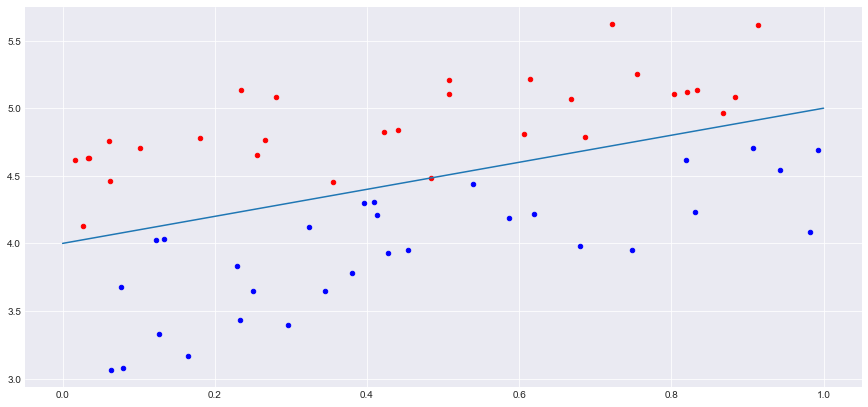

In [8]:
w1 = 0.5  # весовой коэффициент 
w3 = -b*w1  # bias
w = np.array([-w1, w1, w3])  #веса нейрона
for i in range(N):
    x = np.array([C1[0][i], C1[1][i], 1])
    y = np.dot(w, x)
    if y >= 0:
        print('Класс С1')
    else:
        print('Класс С2')
        
plt.figure(figsize = (15,7))
plt.scatter(C1[0][:], C1[1][:], s = 20, c = 'red')
plt.scatter(C2[0][:], C2[1][:], s = 20, c = 'blue')
plt.plot([0+b, 1+b])
plt.grid(True)
plt.show()

## Задача XOR

In [9]:
def XOR(C):
    x = np.array([C[0], C[1], 1]) #передаю на вход значения координаты точек +bias
    w1 = [1, 1, -1.5]   #веса первого нейрона
    w2 = [1, 1, -0.5]   #веса второго нейрона
    w_hidden = np.array([w1, w2])   #первый слой
    w_out = np.array([-1, 1, -0.5])  #веса второго слоя 
    
    sum = w_hidden @ x 
    out = [act(x) for x in sum]
    out.append(1)  # добавляю bias 
    out = np.array(out)
    
    sum = w_out @ out
    y = act(sum)
    return y

In [10]:
C1 = [(1, 0), (0, 1)]
C2 = [(0, 0), (1, 1)]

print(XOR(C1[0]), XOR(C1[1]))
print(XOR(C2[0]), XOR(C2[1]))

1 1
0 0
